In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [2]:
df = pd.read_csv("framingham.csv")

In [3]:
imputer = SimpleImputer(strategy='median')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [4]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_imputed), columns=df.columns)

In [5]:
linked = linkage(df_scaled, method='ward')  # 'ward' minimizes variance within clusters

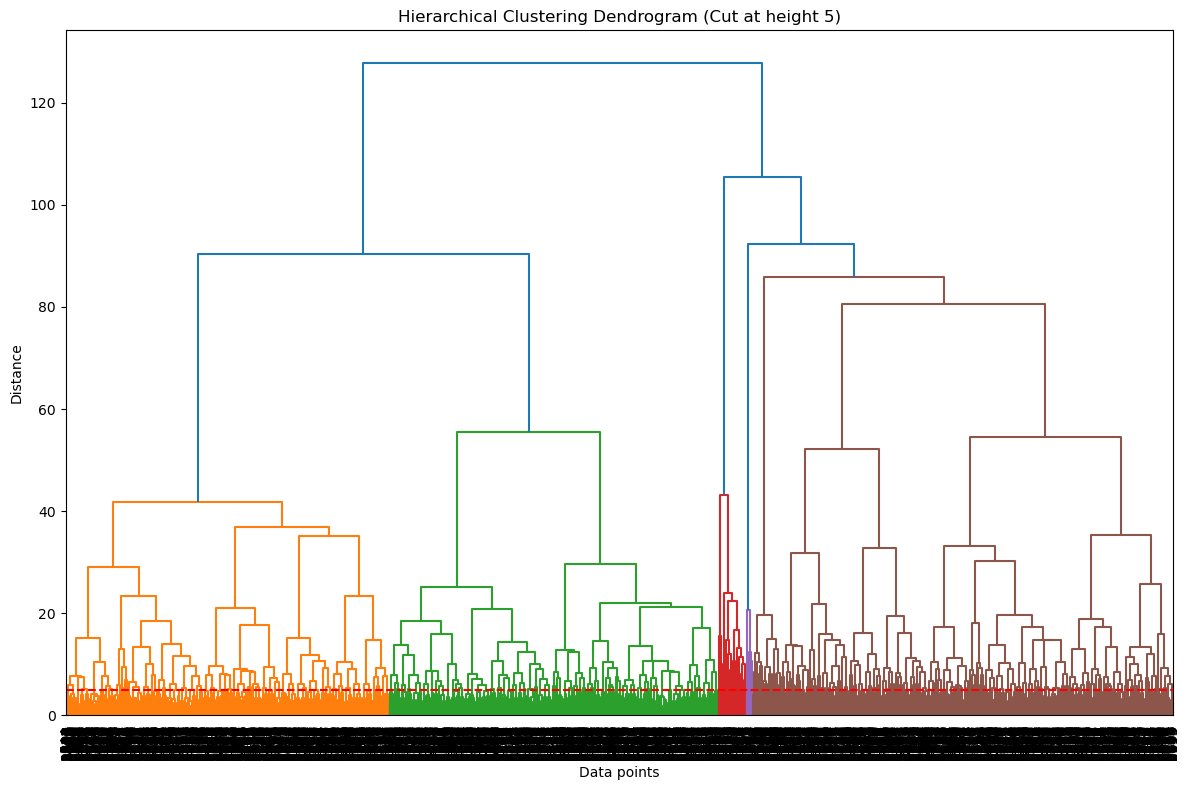

In [16]:
plt.figure(figsize=(12, 8))
dendrogram(linked, leaf_rotation=90, leaf_font_size=10)

# Add horizontal line to cut the dendrogram at a specific distance
plt.axhline(y=5, color='r', linestyle='--')  # Cutting at height 5
plt.title("Hierarchical Clustering Dendrogram (Cut at height 5)")
plt.xlabel("Data points")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()

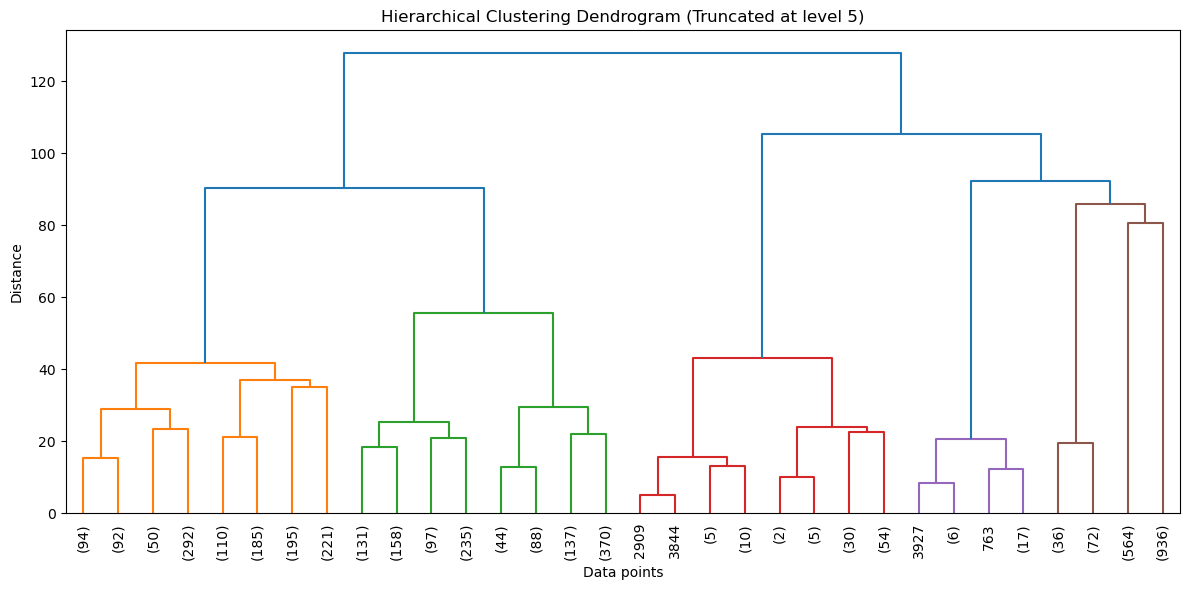

In [15]:
plt.figure(figsize=(12, 6))
dendrogram(linked, truncate_mode='level', p=4, leaf_rotation=90, leaf_font_size=10)
plt.title("Hierarchical Clustering Dendrogram (Truncated at level 5)")
plt.xlabel("Data points")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()

In [7]:
df_imputed['HC_Cluster'] = fcluster(linked, t=5, criterion='maxclust')

In [8]:
df_imputed

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,HC_Cluster
0,1.0,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0.0,1
1,0.0,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0.0,1
2,1.0,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.0,0.0,2
3,0.0,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.0,1.0,5
4,0.0,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0.0,48.0,2.0,1.0,20.0,0.0,0.0,0.0,0.0,248.0,131.0,72.0,22.00,84.0,86.0,0.0,2
4236,0.0,44.0,1.0,1.0,15.0,0.0,0.0,0.0,0.0,210.0,126.5,87.0,19.16,86.0,78.0,0.0,2
4237,0.0,52.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,269.0,133.5,83.0,21.47,80.0,107.0,0.0,1
4238,1.0,40.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,185.0,141.0,98.0,25.60,67.0,72.0,0.0,5


In [11]:
print("\n🔹 Sample records with cluster labels:")
print(df_imputed[['HC_Cluster']].value_counts().reset_index(name='Count'))


🔹 Sample records with cluster labels:
   HC_Cluster  Count
0           5   1608
1           2   1260
2           1   1239
3           3    108
4           4     25
